# Redes Convolucionales

Keras nos permite crear redes convolucionales para procesar imágenes usando la capa `keras.layers.Conv2D`. Los parámetros para estas capas serán los que estudiamos para capas convolucionales (cantidad de kernels, tamaño de cada kernel, stride, tipo de padding, etc.). Podemos mezclarla también con capas de pooling como `keras.layers.MaxPool2D` y  las capas densas que ya hemos visto.

Comenzamos importando las librerías iniciales y mostrando algunos ejemplos.

In [ ]:
import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
(imgs_train, labs_train), (imgs_test, labs_test) = tf.keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

170500096/170498071 [==============================] - 230s 1us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

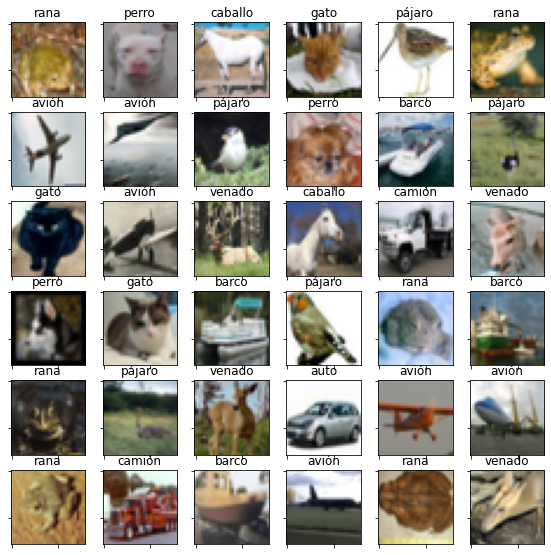

In [ ]:
# Mostramos una grilla de ejemplos (al azar) del conjunto de test

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [ ]:
# Normalizamos los datos de imagenes pero no cambiamos la forma

X_train = imgs_train
X_train = X_train / 255

X_test = imgs_test
X_test = X_test / 255

print(X_train.shape, X_test.shape)

# Las etiquetas si debemos llevarlas a un vector one-hot 

Y_train = tf.keras.utils.to_categorical(labs_train, 10)
Y_test = tf.keras.utils.to_categorical(labs_test, 10)

print(Y_train.shape, Y_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


## Importando capas

Ahora comenzaremos a usar más tipos de capas distintas por lo que será conveniente importarlas para no tener que anteponer `keras.layers` cada vez que las usemos. Las capas que usaremos inicialmente serán `Dense`, `Conv2D`, `MaxPool2D` y `Flatten` (esta última se usa para cambiar la forma de los datos de manera de que puedan ser entregados a una red feed-forward).

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

##  Nuestra primera red convolucional

El siguiente código  crea una red con la siguiente arquitectura

**Convolucional 64 (3x3) --> Max Pooling (2x2) --> Densa 128 (relu) --> Densa 10 **

Las capas se agregan igual que para redes feed-forward. Hay un par de cosas que sería bueno que notes:

- Nota el parámetro `input_shape` de la primera capa. Es similar al `input_dim` de la primera capa densa, pero ahora la forma de la entrada es un tensor que representa a la imagen con su forma habitual `(32,32,3)` es decir, imágenes de 32x32 pixeles y 3 canales de color.
- Nota que hemos usado la capa `Flatten` entre la capa de max pooling y la capa densa. Esto es para cambiar la forma de los tensores que fluyen por la red.

Mira el resumen de la arquitectura de la red y asegúrate que entiendes la forma de la salida de cada capa (es importante entenderlo pues te servirá después para encontrar posibles errores en el código y en el entrenamiento).

In [ ]:
# Creamos una red neuronal convolucional simple

red_conv = keras.Sequential()
red_conv.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation='relu'))
red_conv.add(MaxPool2D((2,2)))
red_conv.add(Flatten())
red_conv.add(Dense(128, activation='relu'))
red_conv.add(Dense(10, activation='softmax'))

red_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1843328   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,846,410
Trainable params: 1,846,410
Non-trainable params: 0
_________________________________________________________________


## Entrenando

Ahora entrenamos por 25 épocas.

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

red_conv.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist = red_conv.fit(
    X_train,Y_train,
    batch_size=64,
    epochs=25,
    validation_data=(X_test,Y_test)
)

Epoch 1/25
782/782 [==============================] - 49s 49ms/step - loss: 2.1197 - accuracy: 0.2274 - val_loss: 1.8789 - val_accuracy: 0.3137
Epoch 2/25
782/782 [==============================] - 30s 38ms/step - loss: 1.7651 - accuracy: 0.3816 - val_loss: 1.6456 - val_accuracy: 0.4166
Epoch 3/25
782/782 [==============================] - 34s 44ms/step - loss: 1.5730 - accuracy: 0.4494 - val_loss: 1.5018 - val_accuracy: 0.4577
Epoch 4/25
782/782 [==============================] - 33s 42ms/step - loss: 1.4427 - accuracy: 0.4905 - val_loss: 1.4220 - val_accuracy: 0.4964
Epoch 5/25
782/782 [==============================] - 31s 40ms/step - loss: 1.3460 - accuracy: 0.5269 - val_loss: 1.3300 - val_accuracy: 0.5210
Epoch 6/25
782/782 [==============================] - 31s 40ms/step - loss: 1.2788 - accuracy: 0.5519 - val_loss: 1.3640 - val_accuracy: 0.5154
Epoch 7/25
782/782 [==============================] - 35s 45ms/step - loss: 1.2335 - accuracy: 0.5690 - val_loss: 1.2715 - val_accuracy:

In [ ]:
# Mostramos la pérdida y el acierto por cada época

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

## Ejercicio: Mejorando el acierto con más capas

La red anterior aunque muy simple, alcanzó un acierto de sobre 60% en unas pocas épocas lo que está muy por encima de la red feed-forward del laboratorio pasado. Lo otro que es fácil notar, si graficaste la pérdida y el acierto, es que la red tiene un sobreajuste (overfitting) considerable,  por lo que sería bueno no solo agregar capas si no también agregar regularización.

Ahora crearás una red convolucional de 3 capas convolucionales y dos capas densas para mejorar la predicción y además agregarás capas de dropout intermedias. Tu red debe tener esta arquitectura

**Convolucional 32 (3x3) -->  Convolucional 32 (3x3) -->  Max Pooling (2x2) --> Convolucional 64 (3x3) --> Max Pooling (2x2) --> Densa 512 -->  Densa 10**

Considera todas las activaciones como `relu`. Si hiciste todo bien, tu red debiera tener alrededor de **1,2M parámetros**. Nota que  es bastante menos que para la red anterior incluso cuando la anterior tenía menos capas (¿puedes explicar por qué?).

Debes realizar lo siguiente:
- Entrena primero con la arquitectura de arriba sin regularización. Hazlo solo por 30 épocas.
- Imprime la pérdida y el acierto por cada época y nota que mejora el acierto, pero que hay  un alto sobreajuste.



### a) Crea la arquitectura 

Crea la arquitectura con 3 capas convolucionales y dos densas, imprime el resumen de la red y entrénala por 30 épocas.

In [ ]:
# Acá empieza tu código para crear la red (~10 líneas de código)



# Acá termina tu código

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)

# Acá tu código para compilar y entrenar la red



# Acá termina tu código.

### b) Imprime los resultados

Muestra un gráfico con la pérdida y el acierto por época de entrenamiento. El acierto debiera mejorar tanto en el conjunto de entrenamiento como en el de prueba, pero también debiera notarse un sobreajuste considerable.

In [ ]:
# Acá tu código para mostrar pérdida y acierto



# Acá termina tu código